In [64]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.electronic_structure.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure.plotter import*
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter

In [65]:
#téléchargement des fichiers
key = "OeM7QMOQddQoMGfFB4h"
material = "mp-866132"
material_name = "Na₂TlSb"
with MPRester(key) as m:
    struct = m.get_structure_by_material_id(material,conventional_unit_cell=True)
    w = CifWriter(struct)
    w.write_file(material+".cif") 
    print("Clique sur le lien pour télécharger mon fichier .CIF")
    display(FileLink(material+".cif"))

Clique sur le lien pour télécharger mon fichier .CIF


/home/users/h/u/husimon/lmapr/mp-866132.cif

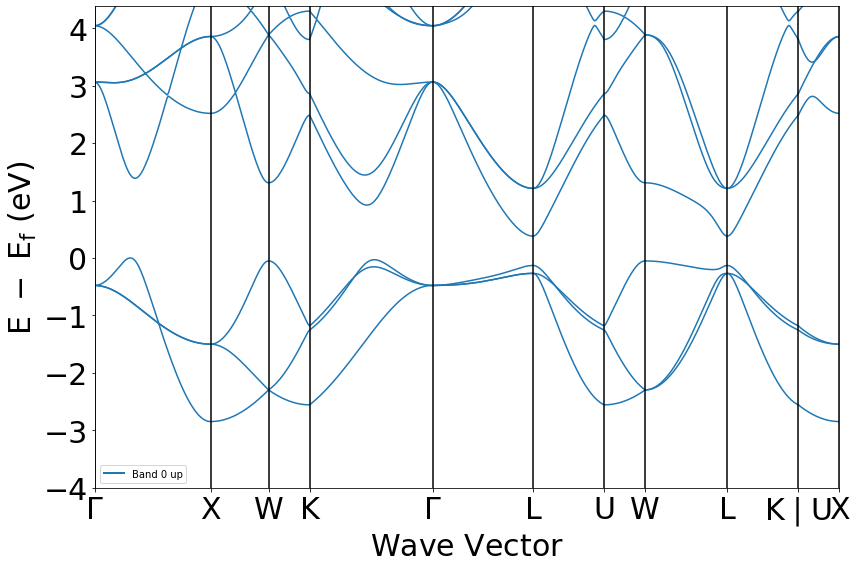

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

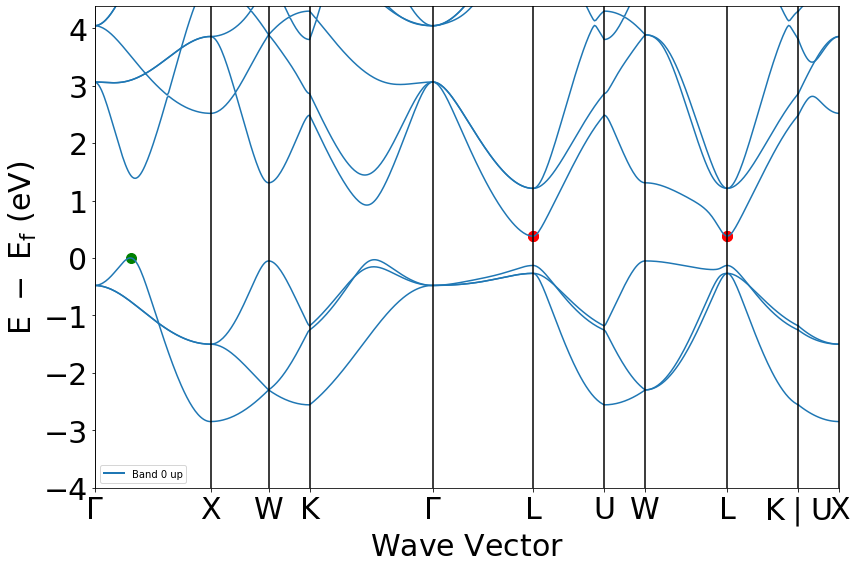

In [66]:
structure = m.get_bandstructure_by_material_id("mp-866132")#866132
electro_band_plot = BSPlotter(structure)
electro_band_plot.show()
electro_band_plot.get_plot(vbm_cbm_marker = True)

# 1) Trouver la bande interdite

In [67]:
band_gap = structure.get_band_gap()
print(band_gap)
if(band_gap['direct'] == False):
    print("La bande d'énergie est indirect \nElle vaut "+str(band_gap['energy'])+" eV \nLa transiton: "+str(band_gap['transition'])+".\n")
    print("Mon materiau est donc un semi-conducteur")
elif(band_gap['direct']==True):
    print("La bande d'énergie est direct \nElle vaut "+str(band_gap['energy'])+" eV \nLa transition: "+str(band_gap['transition'])+".\n")
    print("Mon materiau est donc un semi-conducteur")

{'direct': False, 'energy': 0.37970000000000015, 'transition': '(0.157,0.000,0.157)-L'}
La bande d'énergie est indirect 
Elle vaut 0.37970000000000015 eV 
La transiton: (0.157,0.000,0.157)-L.

Mon materiau est donc un semi-conducteur


La bande interdite est l'intervalle entre la première bande de conduction et la dernière bande de valence. Dans cette zone, la densité électronique est nulle. Cette bande interdite est indirecte car comme l'on peut le voir sur le graphique ci dessus, le point vert et les points rouges ne sont pas sur la même ligne verticale. C'est donc une bande interdite indirecte. 
Dans mon cas, la bande d'énergie de mon matériau vaut 0,3797 $eV$. Selon cette valeur, je peux dire que mon matériau est un semi-conducteur. 

Si mon matériau avait une bande d'énergie inférieure à 0,3797 $eV$, je l'aurait considéré comme conducteur. 


# 2) Direction de la dispersion minimale et maximale dans la bande de valence et de conduction

# 2.1) Récupération des donnée de la 1ère bande de conduction et de la dernière bande de valence

In [68]:
vbm = structure.get_vbm()
print("Index vbm :" , vbm['band_index'])   
cbm = structure.get_cbm()
print("Index cbm :" ,cbm['band_index']) 

Index vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
Index cbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


# 2.2) Application sur le graphique

[1.2399739  3.5155837  3.8803599  0.80524985 0.48744163 2.08408022
 3.8803599  0.13531353 2.08408022 1.09142625]
[0.6616428  2.93325073 4.04054093 0.65970349 3.75768347 4.17152698
 4.04054093 1.59237787 4.17152698 0.10770202]
Le maximum de dispersion dans la bande de valence correspond à la pente de  3.8803598968435233 dans la direction W-K ainsi que la direction U-W
Celui-ci est représenté par la flèche rouge sur le graphe
Le minimum de dispersion dans la bande de valence correspond à la pente de  0.13531353127417692 dans la direction W-L
Celui-ci est représenté par la flèche rouge sur le graphe
 
Le maximum de dispersion dans la bande de conduction correspond à la pente de  4.171526977363536 dans les directions L-U ainsi que la direction L-K
Celui-ci est représenté par la flèche rouge sur le graphe
Le minimum de dispersion dans la bande de conduction correspond à la pente de  0.1077020248924198 dans la direction /-UX
Celui-ci est représenté par la flèche rouge sur le graphe
 


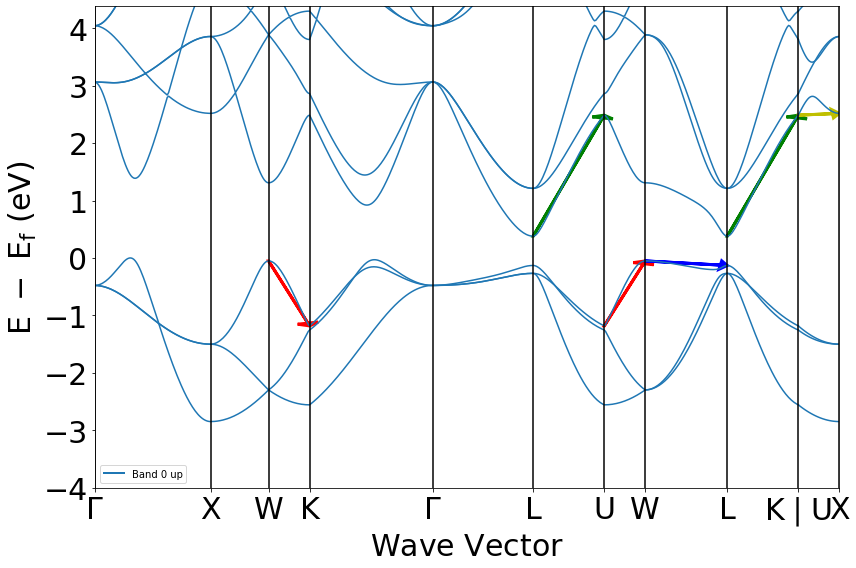

In [82]:
data = electro_band_plot.bs_plot_data()
pl = electro_band_plot.get_plot()
E = data.get('energy').get('1')
D = data.get('ticks').get('distance')

Vindex = 15#valeur récupérée juste au dessus
Cindex = 16#valeur récupérée juste au dessus

slopeV = np.zeros(10)
slopeC = np.zeros(10)
Dbranch = np.unique(D)  
for i in range(10):
    DeltaD = Dbranch[i+1]-Dbranch[i]
    slopeV[i] = abs(((E[i][Vindex])[-1] - (E[i][Vindex])[0])/(DeltaD) )
    slopeC[i] = abs(((E[i][Cindex])[-1] - (E[i][Cindex])[0])/(DeltaD) )
    
print(slopeV) #max = 2 et 6 ///// min = 7
print(slopeC) #max = 5 et 8 ///// min = 9


maxV = np.max(slopeV)
minV = np.min(slopeV)
print("Le maximum de dispersion dans la bande de valence correspond à la pente de ",maxV,"dans la direction W-K ainsi que la direction U-W")
print("Celui-ci est représenté par la flèche rouge sur le graphe")
print("Le minimum de dispersion dans la bande de valence correspond à la pente de ",minV,"dans la direction W-L")
print("Celui-ci est représenté par la flèche rouge sur le graphe")
print(" ")
maxC = np.amax(slopeC)
minC = np.amin(slopeC)
print("Le maximum de dispersion dans la bande de conduction correspond à la pente de ",maxC,"dans les directions L-U ainsi que la direction L-K")
print("Celui-ci est représenté par la flèche rouge sur le graphe")
print("Le minimum de dispersion dans la bande de conduction correspond à la pente de ",minC,"dans la direction /-UX")
print("Celui-ci est représenté par la flèche rouge sur le graphe")
print(" ")

plt.arrow(Dbranch[2], (E[2][Vindex])[0],Dbranch[3] - Dbranch[2], (E[2][Vindex])[-1] - (E[2][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[6], (E[6][Vindex])[0],Dbranch[7] - Dbranch[6], (E[6][Vindex])[-1] - (E[6][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[7], (E[7][Vindex])[0], Dbranch[8] -Dbranch[7], (E[7][Vindex])[-1] - (E[7][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[5], (E[5][Cindex])[0], Dbranch[6] -Dbranch[5], (E[5][Cindex])[-1] - (E[5][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[8], (E[8][Cindex])[0], Dbranch[9] -Dbranch[8], (E[8][Cindex])[-1] - (E[8][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[9], (E[9][Cindex])[0], Dbranch[10] -Dbranch[9], (E[9][Cindex])[-1] - (E[9][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)


# 3) Masse effective

La formule de la masse effective en supposant une dispersion parabolique est :<h1><center>$m^* = \frac{\hbar^2k^2}{2 . E(k)}$</center></h1>
$\hbar = \frac{h}{2\pi}$  $h$ étant la constante de Planck.

$\hbar$ la contante réduite de Planck égale à $6.582 \times 10^{−16} eVs$.

$E(k)$ est l'énergie d'un electron de vecteur d'onde $k$ dans la bande que l'on considère.

In [73]:
h_bar = 6.582e-16 #en eV

val = structure.get_vbm()
E_val = val['energy']
kpoint_val = val['kpoint'].cart_coords

mEffVal = (h_bar**2 * (kpoint_val[0]**2+kpoint_val[1]**2+kpoint_val[2]**2))/(2*abs(E_val))

print("Pour la dernière bande de valence, la masse effective au sommet équivaut à : " + 
      str(mEffVal)+ "[kg]\n")

cond = structure.get_cbm()
E_cond = cond['energy']
kpoint_cond = cond['kpoint'].cart_coords

mEffCond = (h_bar**2 * (kpoint_cond[0]**2+kpoint_cond[1]**2+kpoint_cond[2]**2))/(2*abs(E_cond))

print("Pour la première bande de conduction, la masse effective à la base équivaut à : " + 
      str(mEffCond) + "[kg]")

Pour la dernière bande de valence, la masse effective au sommet équivaut à : 4.1313877875420455e-33[kg]

Pour la première bande de conduction, la masse effective à la base équivaut à : 2.8485140622314056e-32[kg]
